In [1]:
import numpy as np
import matplotlib.pyplot as plt
def gen_paths_a(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [2]:


def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        #rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths



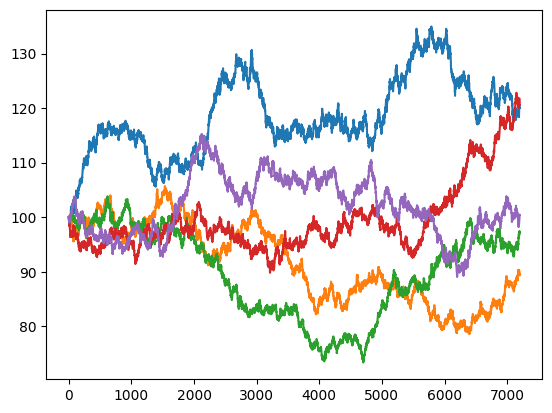

In [3]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 7200
I = 5
x = gen_paths(S0, r, sigma, T, M, I)
plt.plot(x); # S0, r, sigma, T, M, I


In [5]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
y = scaler.fit_transform(x)
scaler.inverse_transform(y)

array([[100.        , 100.        , 100.        , 100.        ,
        100.        ],
       [ 99.74517523,  99.98538585, 100.11533151,  99.96264969,
         99.74348983],
       [ 99.54195403,  99.83144586,  99.89391679,  99.80710792,
         99.77006558],
       ...,
       [120.20203133,  89.49369338,  97.00692412, 120.73351304,
        100.48133061],
       [120.52275353,  89.68511463,  97.01137157, 120.59763536,
        100.46185168],
       [120.53116787,  89.35166782,  97.17513993, 120.54157064,
        100.42355051]])

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

layer = layers.Normalization()
layer.adapt(x)
normalized_data = layer(x)
normalized_data



<tf.Tensor: shape=(7201, 5), dtype=float32, numpy=
array([[-2.6477911 ,  1.1724578 ,  1.2603378 ,  0.10239012, -0.3565536 ],
       [-2.684186  ,  1.1704253 ,  1.2746122 ,  0.0964973 , -0.40336317],
       [-2.7132115 ,  1.1490221 ,  1.2472079 ,  0.07195954, -0.39851388],
       ...,
       [ 0.2375628 , -0.28831762,  0.8898979 ,  3.3732688 , -0.26871663],
       [ 0.28336915, -0.26170278,  0.89044744,  3.3518326 , -0.27227113],
       [ 0.28457108, -0.30806395,  0.9107169 ,  3.3429887 , -0.2792603 ]],
      dtype=float32)>

In [19]:
y

In [45]:
[i for i in range(20)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [27]:
def returns(s):
    price = [] 
    for t in range(1,len(s)):
        price.append(s[t] - s[t - 1])
    return np.array(price)
def vari(s):
    var = [] 
    for t in range(1,len(s)):
        var.append((s[t] - s[t - 1]) ** 2)
    return np.array(var)

In [30]:
for i in range(10):
    x = gen_paths(S0, r, sigma, T, M, I).flatten()
    ret = returns(x)
    var = vari(ret)
    for ii in range(0,len(x),int(len(x)/5)):
        x[:ii] = ret[:ii]*100
x

array([-61.56672853,  -8.89608761,  10.19436079, ..., -30.78979304,
        11.6345573 ,  87.97767577])

In [17]:
x = gen_paths(S0, r, sigma, T, M, I).flatten()
x

array([100.        ,  99.8552949 , 100.3118088 , ...,  91.38776914,
        91.42183742,  91.42022049])

In [22]:
x.flatten().shape

(1800250,)

In [28]:
paths = np.zeros((M + 1, I), np.float64)
paths[0] = S0
paths[:,1], paths.shape

(array([100.,   0.,   0., ...,   0.,   0.,   0.]), (7201, 250))